# DP solution to the Machine Replacement Problem
## Problem statement:
- A machine can be in any of the states 1,2, ... , N considering a finite set of states for convenience
- At the beginning of each day, the state of the machine is noted and a decision upon whether or not to replace the machine is made
- If the decision to replace is made, then we assume that the machine is instantaneously replaced by a new machine whose state is O
- The cost of replacing the machine will be denoted by R
- a maintenance cost C(i) is incurred each day that the machine is in state i.
- we let $P_{ij}$ represent the probability that a machine in state i at the beginning of one day will be in state j at the beginning of the next day.

## Precise definition:
- the above is a two-action Markov decision model in which action 1 is the replacement action and action 2 the nonreplacement action.

#### Transition Probabilities
$$P_{ij}(0) = P_{0j}$$
$$P_{ij}(1) = P_{ij}$$
for all $i\ge 0$

#### One stage costs(rewards)
$$C(i,0) = R+C(0)$$
$$C(i,1) = C(i)$$
for all $i\ge 0$

## Assumptions:
i. $\{C(i) , i\ge 0\}$ is a bounded increasing sequence.  
ii. $\sum_{j=k}^{\infty}P_{ij}$ is an increasing function of i, for each $k\ge 0$


## Cost function:
- A simple cost function with $C(i) = i^2 + i$ is used

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def maintenance_cost(state):
    return state**2 + state

def cost_function(state, action, replacement_cost):
    if action == 0:
        return replacement_cost + maintenance_cost(0)
    else:
        return maintenance_cost(state)

In [3]:
# set total number of states and define a transition probability matrix of that size
N = 10
replacement_cost = 50
transition_probability = np.zeros((2,N,N))

In [4]:
C = [[cost_function(i, j, replacement_cost) for i in range(N)] for j in range(2)]
C = np.array(C)
C

array([[50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90]])

In [5]:
def fill_transition_probability_matrix(transition_probability, p=0.5):
    for j in range(transition_probability.shape[1]-1):
        transition_probability[1][j][j] = p
        transition_probability[1][j][j+1] = 1-p
    for i in range(transition_probability.shape[1]):
        for j in range(transition_probability.shape[2]):
            transition_probability[0][i][j] = transition_probability[1][0][j]
    transition_probability[1, transition_probability.shape[1]-1, transition_probability.shape[1]-1] = 1



In [6]:
def policy_visualization(policy):
    plt.bar(range(N), policy)
    plt.xlabel("State")
    plt.ylabel("Action")
    plt.show()

In [7]:
fill_transition_probability_matrix(transition_probability=transition_probability, p=0.2)
transition_probability

array([[[0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]],

       [[0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.2, 0.8, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.2, 0.8, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ,

In [8]:
def T(R, P, V, alpha=0.5):
    return R + alpha* (P @ V)


In [9]:
def evaluate_policy(f, C, P, V, delta=0.01, max_iter=10):
    R = np.array([C[int(f[i])][i] for i in range(N)])
    P = np.array([transition_probability[int(f[i]), i, :] for i in range(N) ])
    for i in range(max_iter):
        V_new = T(R, P, V)
        if(np.linalg.norm(V_new-V, np.inf) < delta):
            return V_new
        V = V_new
    return V

In [10]:
def improve_policy_greedy(C, P, V):
    q = [T(C[i], P[i], V) for i in range(2)]
    return np.argmin(q,axis=0)

In [11]:
def modified_policy_iteration(C, P, max_evaluation_iter=100, initial_policy=np.random.random(N), max_iter=100, epsilon=0.01):
    V = np.zeros(N)
    policy = initial_policy
    for i in range(max_iter):
        V_new = evaluate_policy(policy, C, P, V, max_iter=max_evaluation_iter)
        policy = improve_policy_greedy(C, P, V_new)
        print(policy)
        if np.linalg.norm(V_new-V, np.inf) < epsilon:
            return policy, V
        V = V_new
    return policy, V


[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]


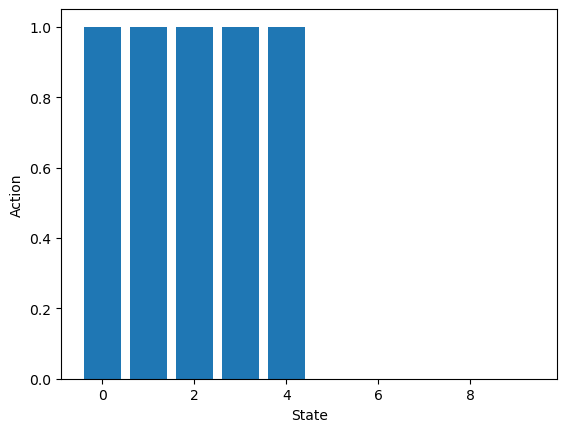

[ 5.30424363 11.93172553 21.84068272 34.13588236 46.8024375  55.30424363
 55.30424363 55.30424363 55.30424363 55.30424363]


In [12]:
policy, V = modified_policy_iteration(C, transition_probability, max_iter=10)
policy_visualization(policy)
print(V)

[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]


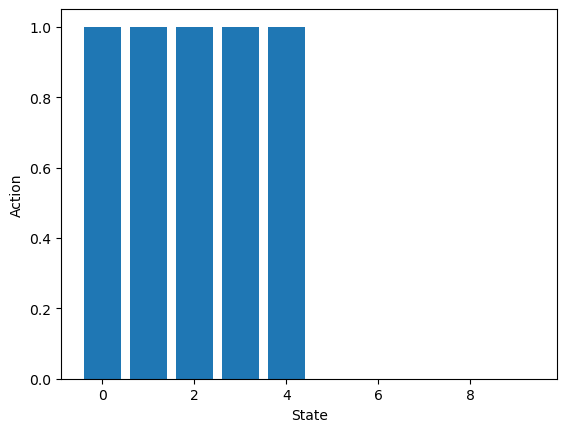

[ 5.31368513 11.93351587 21.84321638 34.14628663 46.81681162 55.31368512
 55.31368512 55.31368512 55.31368512 55.31368512]


In [13]:
policy, V = modified_policy_iteration(C, transition_probability, max_evaluation_iter=1, max_iter=100)
policy_visualization(policy)
print(V)

In [14]:
# Solution for the problem given in Sheldon Ross

V_a = np.zeros(N)
while True:
    V_new = np.zeros(N)
    for i in range(N):
        V_new[i] = min(maintenance_cost(i) + 0.5*(transition_probability[1][i] @ V_a), replacement_cost + maintenance_cost(0) + 0.5*(transition_probability[0][i] @ V_a))

    if np.linalg.norm(V_new-V_a, ord=np.inf) < 0.01:
        print(V_new)
        break

    V_a = V_new


[ 5.29624909 11.9232463  21.83277795 34.12864641 46.79525213 55.29624909
 55.29624909 55.29624909 55.29624909 55.29624909]


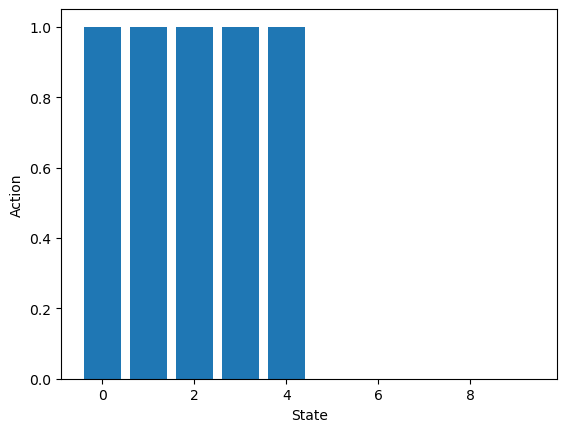

In [15]:
optimal_policy = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
policy_visualization(optimal_policy)

[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 0 0 0 0 0]


<function matplotlib.pyplot.show(close=None, block=None)>

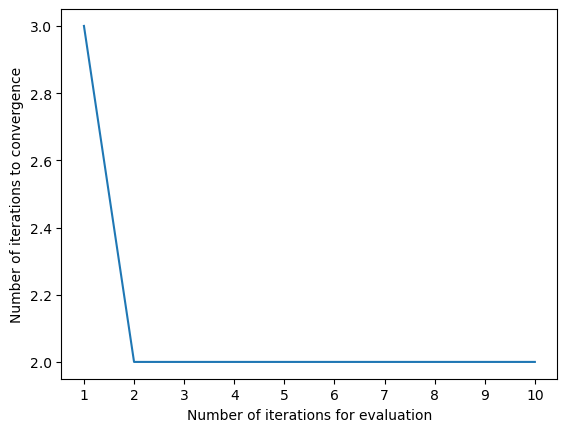

In [16]:
num_eval_data = {}

for i in range(1, 11):
    for j in range(5):
        policy, V = modified_policy_iteration(C, transition_probability, max_evaluation_iter=i, max_iter=j)

        if np.array_equal(policy, optimal_policy):
            num_eval_data[i] = j
            break

plt.plot(num_eval_data.keys(), num_eval_data.values())
plt.xticks(range(1, 11))
plt.xlabel("Number of iterations for evaluation")
plt.ylabel("Number of iterations to convergence")
plt.show